### ***`Imports`***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gc
import re
import nltk
import tensorflow as tf

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras import layers
from wordcloud import WordCloud


import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category= ConvergenceWarning)

TrainDF = pd.read_csv("train.csv")
TestDF = pd.read_csv("test.csv")

### ***`Presenting Data`***

##### ***Info***

In [2]:
TrainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12841 entries, 0 to 12840
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   job title                   12841 non-null  object
 1   office location             12582 non-null  object
 2   department                  4581 non-null   object
 3   salary offered for the job  2089 non-null   object
 4   company information         10436 non-null  object
 5   job description             12841 non-null  object
 6   job requirements            10900 non-null  object
 7   benefits                    7596 non-null   object
 8   telecommuting               12841 non-null  int64 
 9   company logo exist?         12841 non-null  int64 
 10  has_questions               12841 non-null  int64 
 11  employment_type             10313 non-null  object
 12  experience required         7755 non-null   object
 13  education required          6988 non-null   ob

In [3]:
TestDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   job title                   3198 non-null   object
 1   office location             3153 non-null   object
 2   department                  1115 non-null   object
 3   salary offered for the job  505 non-null    object
 4   company information         2621 non-null   object
 5   job description             3197 non-null   object
 6   job requirements            2729 non-null   object
 7   benefits                    1976 non-null   object
 8   telecommuting               3198 non-null   int64 
 9   company logo exist?         3198 non-null   int64 
 10  has_questions               3198 non-null   int64 
 11  employment_type             2627 non-null   object
 12  experience required         1973 non-null   object
 13  education required          1792 non-null   obje

##### ***Bar Plots***

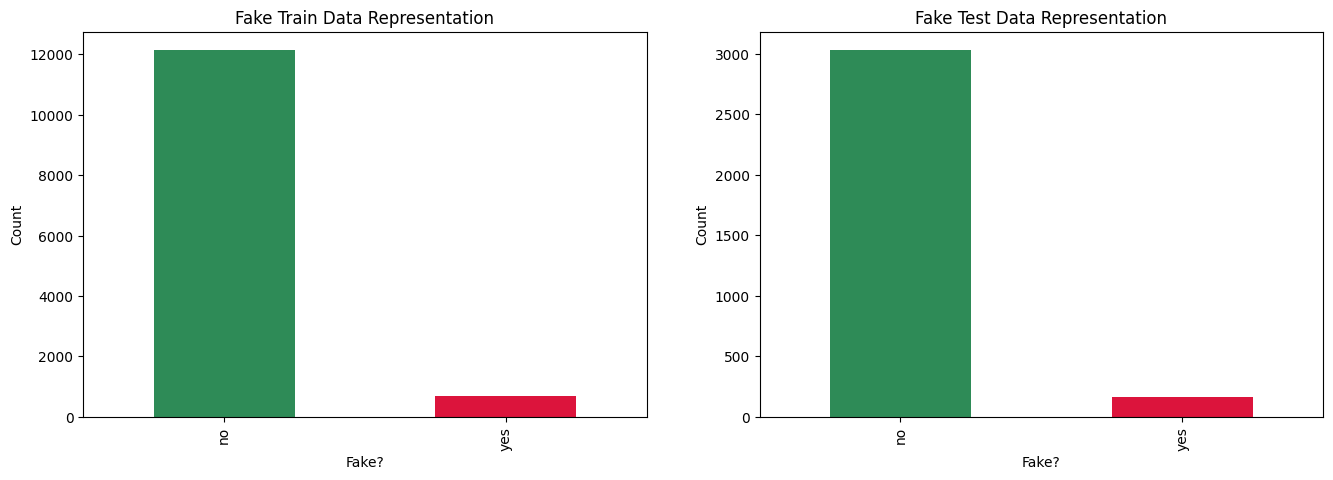

In [4]:
colors = {'yes': 'crimson', 'no': 'seagreen'}

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# plot the first graph on the first subplot
TrainDF['fake?'].value_counts().plot(kind='bar', color=[colors[x] for x in TrainDF['fake?'].unique()], ax=ax1)
ax1.set_xlabel('Fake?')
ax1.set_ylabel('Count')
ax1.set_title('Fake Train Data Representation')

# plot the second graph on the second subplot
TestDF['fake?'].value_counts().plot(kind='bar', color=[colors[x] for x in TestDF['fake?'].unique()], ax=ax2)
ax2.set_xlabel('Fake?')
ax2.set_ylabel('Count')
ax2.set_title('Fake Test Data Representation')

plt.show()


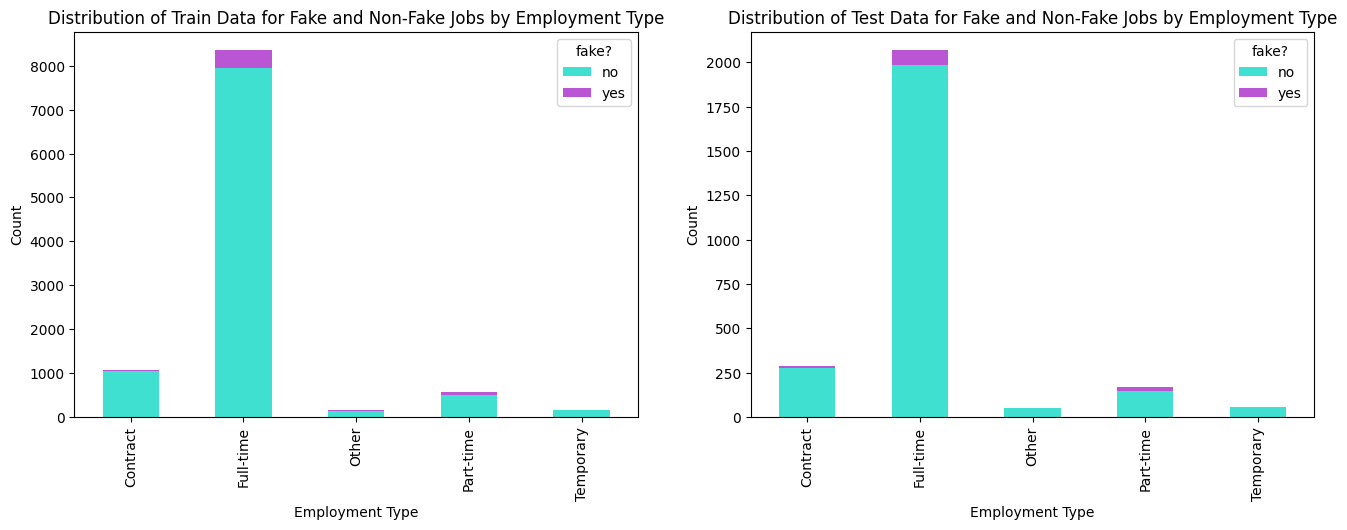

In [5]:
colors = {'yes': 'mediumorchid', 'no': 'turquoise'}

# Group the data
train_dept_counts = TrainDF.groupby('employment_type')['fake?'].value_counts().unstack()
test_dept_counts = TestDF.groupby('employment_type')['fake?'].value_counts().unstack()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot the first one
train_dept_counts.plot(kind='bar', color=[colors[x] for x in TrainDF['fake?'].unique()], stacked=True, ax=ax1)
ax1.set_xlabel('Employment Type')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Train Data for Fake and Non-Fake Jobs by Employment Type')

# Plot the second one
test_dept_counts.plot(kind='bar',color=[colors[x] for x in TestDF['fake?'].unique()], stacked=True, ax=ax2)
ax2.set_xlabel('Employment Type')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Test Data for Fake and Non-Fake Jobs by Employment Type')

plt.show()


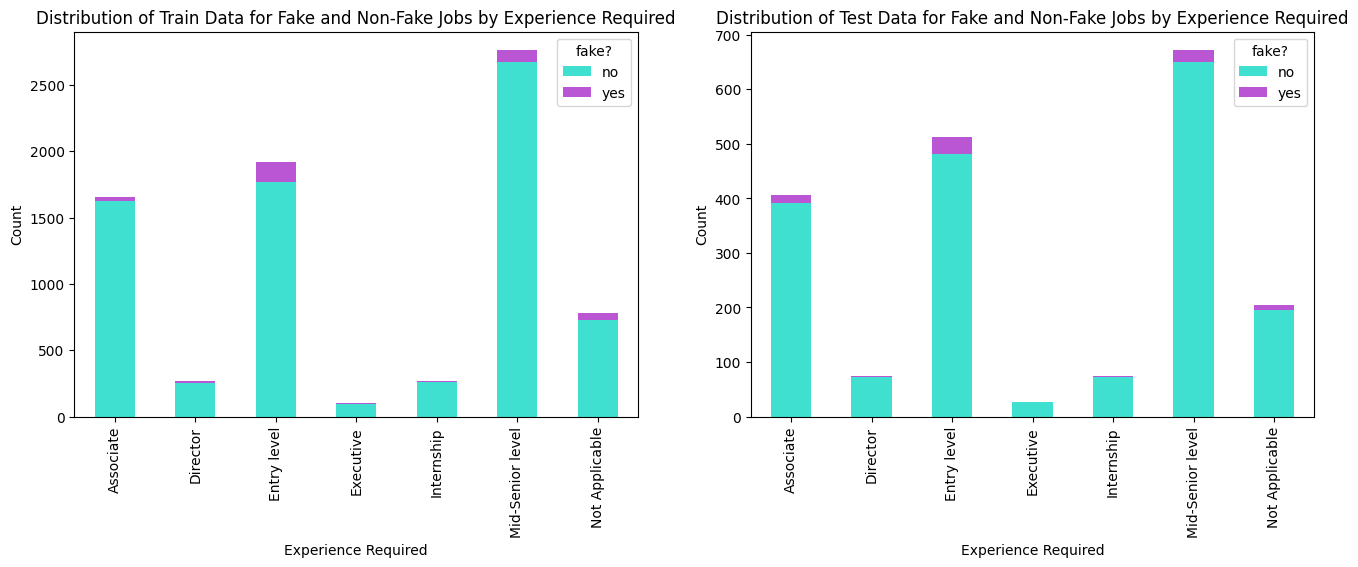

In [6]:
colors = {'yes': 'mediumorchid', 'no': 'turquoise'}

# Group the data
train_dept_counts = TrainDF.groupby('experience required')['fake?'].value_counts().unstack()
test_dept_counts = TestDF.groupby('experience required')['fake?'].value_counts().unstack()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot the first one
train_dept_counts.plot(kind='bar', color=[colors[x] for x in TrainDF['fake?'].unique()], stacked=True, ax=ax1)
ax1.set_xlabel('Experience Required')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Train Data for Fake and Non-Fake Jobs by Experience Required')

# Plot the second one
test_dept_counts.plot(kind='bar',color=[colors[x] for x in TestDF['fake?'].unique()], stacked=True, ax=ax2)
ax2.set_xlabel('Experience Required')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Test Data for Fake and Non-Fake Jobs by Experience Required')

plt.show()

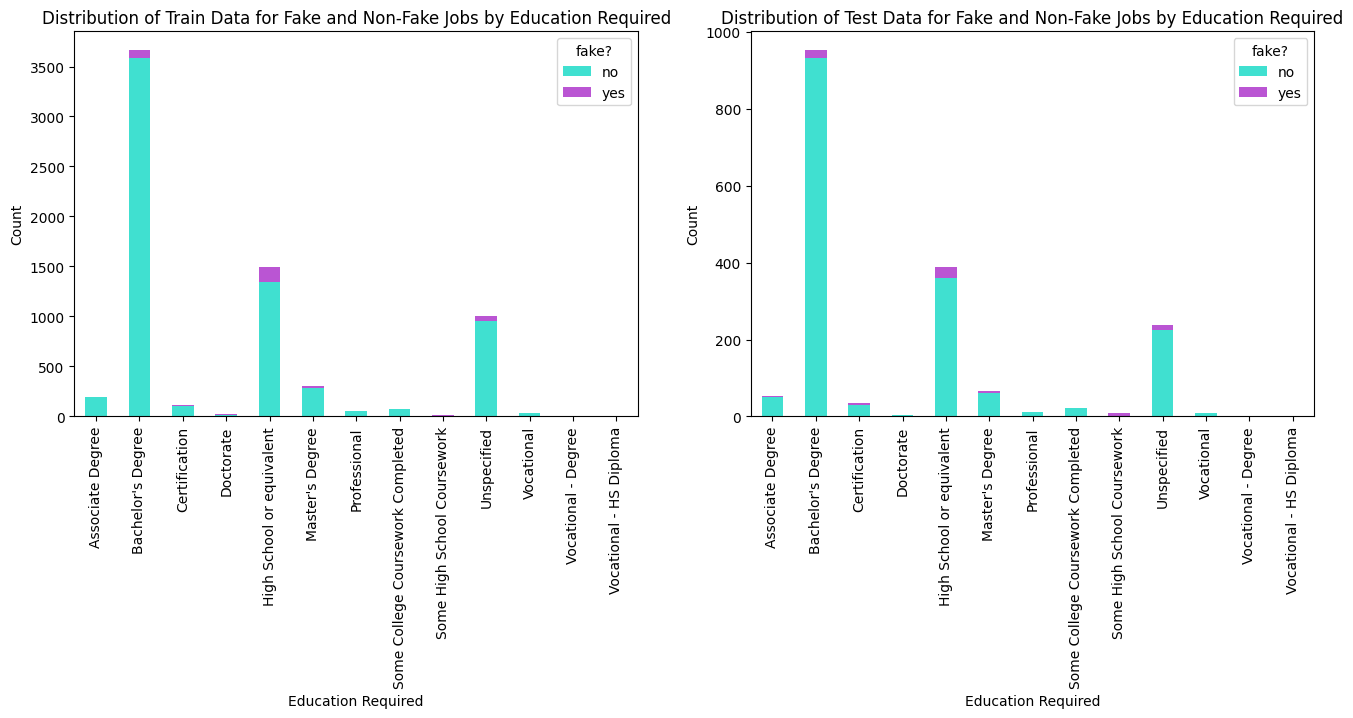

In [7]:
colors = {'yes': 'mediumorchid', 'no': 'turquoise'}

# Group the data
train_dept_counts = TrainDF.groupby('education required')['fake?'].value_counts().unstack()
test_dept_counts = TestDF.groupby('education required')['fake?'].value_counts().unstack()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot the first one
train_dept_counts.plot(kind='bar', color=[colors[x] for x in TrainDF['fake?'].unique()], stacked=True, ax=ax1)
ax1.set_xlabel('Education Required')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Train Data for Fake and Non-Fake Jobs by Education Required')

# Plot the second one
test_dept_counts.plot(kind='bar',color=[colors[x] for x in TestDF['fake?'].unique()], stacked=True, ax=ax2)
ax2.set_xlabel('Education Required')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Test Data for Fake and Non-Fake Jobs by Education Required')

plt.show()

##### ***Nulls***

In [8]:
print('Number of nulls in Train Data.')
TrainDF.isnull().sum()

Number of nulls in Train Data.


job title                         0
office location                 259
department                     8260
salary offered for the job    10752
company information            2405
job description                   0
job requirements               1941
benefits                       5245
telecommuting                     0
company logo exist?               0
has_questions                     0
employment_type                2528
experience required            5086
education required             5853
industry                       3546
function                       4659
fake?                             0
dtype: int64

In [9]:
print('Number of nulls in Test Data.')
TestDF.isnull().sum()

Number of nulls in Test Data.


job title                        0
office location                 45
department                    2083
salary offered for the job    2693
company information            577
job description                  1
job requirements               469
benefits                      1222
telecommuting                    0
company logo exist?              0
has_questions                    0
employment_type                571
experience required           1225
education required            1406
industry                       837
function                      1122
fake?                            0
dtype: int64

In [10]:
print('Percentege of nulls in Train Data. \n')
print('salary offered for the job   ', (TrainDF['salary offered for the job'].isnull().sum()/TrainDF.shape[0])*100,'%')

Percentege of nulls in Train Data. 

salary offered for the job    83.7317965890507 %


In [11]:
print('Percentege of nulls in Test Data. \n')
print('salary offered for the job   ', (TestDF['salary offered for the job'].isnull().sum()/TestDF.shape[0])*100,'%')

Percentege of nulls in Test Data. 

salary offered for the job    84.20888055034396 %


### ***`Pre-Processing`***

##### ***Pre-process***

In [12]:
# Drop salary offered for the job column in train data because it has 84 % approx null values.
# Drop salary offered for the job column in test data because it has 84 % approx null values.
# Also we dropped telecommuting, has_questions, company logo exist? columns because they does not have any logical meaning.

TrainDF.drop(['salary offered for the job', 'telecommuting', 'has_questions', 'company logo exist?'], axis = 1, inplace = True)
TrainDF = TrainDF.drop_duplicates()

TestDF.drop(['salary offered for the job', 'telecommuting', 'has_questions', 'company logo exist?'], axis = 1, inplace = True)
TestDF = TestDF.drop_duplicates()

In [13]:
# Split office location to country, state and city
TrainDF['country'] = TrainDF['office location'].str.split(',').str[0]
TrainDF['state'] = TrainDF['office location'].str.split(',').str[1]
TrainDF['city'] = TrainDF['office location'].str.split(',').str[2]

TestDF['country'] = TestDF['office location'].str.split(',').str[0]
TestDF['state'] = TestDF['office location'].str.split(',').str[1]
TestDF['city'] = TestDF['office location'].str.split(',').str[2]

TrainDF.drop(['office location'], axis=1, inplace=True)
TestDF.drop(['office location'], axis=1, inplace=True)

In [14]:
# Train
# Handling nulls to ignore empty text
new1 = ['company information', 'job description', 'job requirements', 'benefits']
for j in new1:
    TrainDF[j] = np.where(TrainDF[j].isnull(), '&& ', TrainDF[j])

# Replacing nulls in new columns
new2 = ['country', 'state', 'city']
for i in new2:
     TrainDF[i] = TrainDF[i].replace(' ', 'missing')    

# Replacing nulls
for c in TrainDF.columns:
    TrainDF[c] = np.where(TrainDF[c].isnull(), 'missing', TrainDF[c])

In [15]:
# Test
# Handling nulls to ignore empty text
new1 = ['company information', 'job description', 'job requirements', 'benefits']
for j in new1:
    TestDF[j] = np.where(TestDF[j].isnull(), '&& ', TestDF[j])

# Replacing nulls in new columns
new2 = ['country', 'state', 'city']
for i in new2:
     TestDF[i] = TestDF[i].replace(' ', 'missing')    

# Replacing nulls

for c in TrainDF.columns:
    TestDF[c] = np.where(TestDF[c].isnull(), 'missing', TestDF[c])

In [16]:
# Merging text data into one column & deleting Nulls of ignored empty text

TrainDF['Text Info'] = TrainDF['company information'] + ' ' + TrainDF['job description'] + ' ' + TrainDF['job requirements'] + ' ' + TrainDF['benefits']
TrainDF['Text Info'] = TrainDF['Text Info'].apply(lambda x: x.replace('&& ', '').strip())
TrainDF.drop(['company information', 'job description', 'job requirements', 'benefits'], axis=1, inplace=True)

TestDF['Text Info'] = TestDF['company information'] + ' ' + TestDF['job description'] + ' ' + TestDF['job requirements'] + ' ' + TestDF['benefits']
TestDF['Text Info'] = TestDF['Text Info'].apply(lambda x: x.replace('&& ', '').strip())
TestDF.drop(['company information', 'job description', 'job requirements', 'benefits'], axis=1, inplace=True)

##### ***Nulls after update***

In [17]:
print('Number of nulls in Train Data after update.')
TrainDF.isnull().sum()

Number of nulls in Train Data after update.


job title              0
department             0
employment_type        0
experience required    0
education required     0
industry               0
function               0
fake?                  0
country                0
state                  0
city                   0
Text Info              0
dtype: int64

In [18]:
print('Number of nulls in Test Data after update.')
TestDF.isnull().sum()

Number of nulls in Test Data after update.


job title              0
department             0
employment_type        0
experience required    0
education required     0
industry               0
function               0
fake?                  0
country                0
state                  0
city                   0
Text Info              0
dtype: int64

##### ***Location Bar Plots***

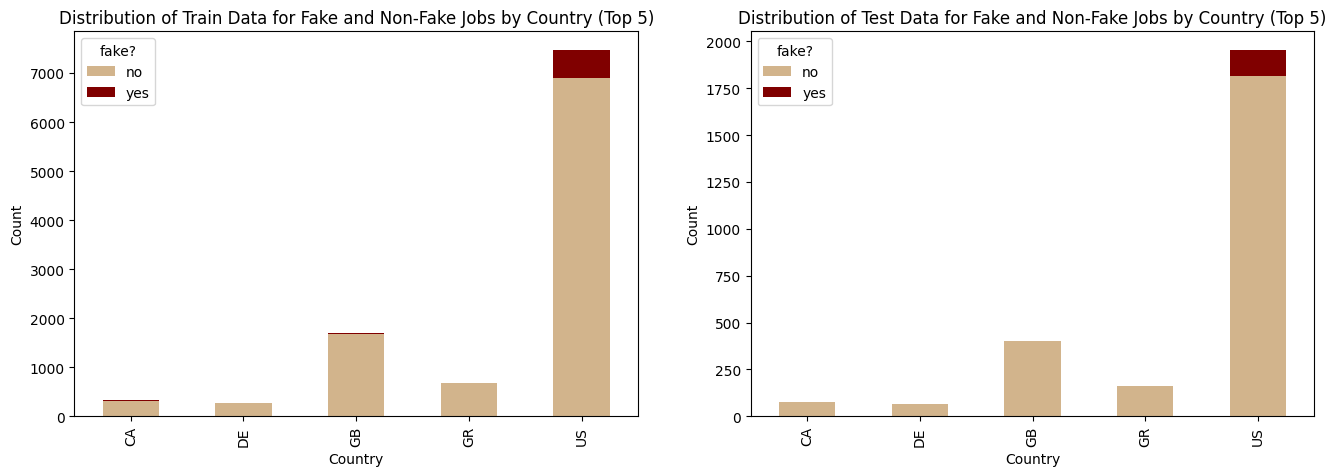

In [19]:
# Get the top 5 countries based on the number of job postings
top_countries = TrainDF['country'].value_counts().nlargest(5).index.tolist()

# Create a new DataFrame with only the top 5 countries
train_top_counts = TrainDF.loc[TrainDF['country'].isin(top_countries)].groupby(['country', 'fake?'])['fake?'].count().unstack().fillna(0)
test_top_counts = TestDF.loc[TestDF['country'].isin(top_countries)].groupby(['country', 'fake?'])['fake?'].count().unstack().fillna(0)

colors = {'yes': 'maroon', 'no': 'tan'}

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot the first one
train_top_counts.plot(kind='bar', color=[colors[x] for x in TrainDF['fake?'].unique()], stacked=True, ax=ax1)
ax1.set_xlabel('Country')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Train Data for Fake and Non-Fake Jobs by Country (Top 5)')

# Plot the second one
test_top_counts.plot(kind='bar', color=[colors[x] for x in TestDF['fake?'].unique()], stacked=True, ax=ax2)
ax2.set_xlabel('Country')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Test Data for Fake and Non-Fake Jobs by Country (Top 5)')

plt.show()


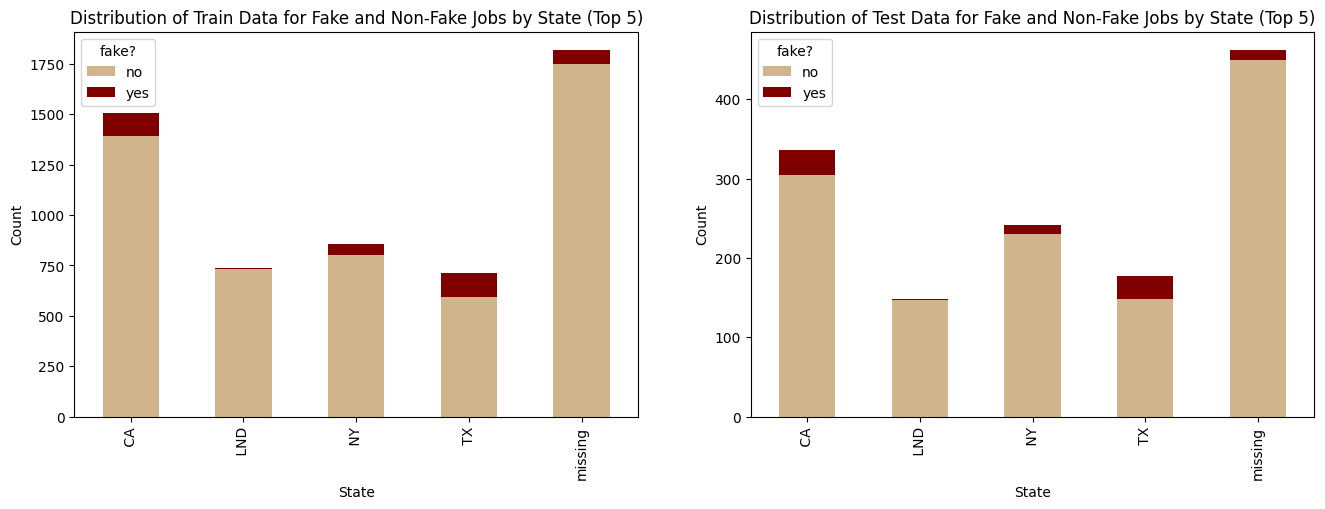

In [20]:
# Get the top 5 States based on the number of job postings
top_countries = TrainDF['state'].value_counts().nlargest(5).index.tolist()

# Create a new DataFrame with only the top 5 countries
train_top_counts = TrainDF.loc[TrainDF['state'].isin(top_countries)].groupby(['state', 'fake?'])['fake?'].count().unstack().fillna(0)
test_top_counts = TestDF.loc[TestDF['state'].isin(top_countries)].groupby(['state', 'fake?'])['fake?'].count().unstack().fillna(0)

colors = {'yes': 'maroon', 'no': 'tan'}

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot the first one
train_top_counts.plot(kind='bar', color=[colors[x] for x in TrainDF['fake?'].unique()], stacked=True, ax=ax1)
ax1.set_xlabel('State')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Train Data for Fake and Non-Fake Jobs by State (Top 5)')

# Plot the second one
test_top_counts.plot(kind='bar', color=[colors[x] for x in TestDF['fake?'].unique()], stacked=True, ax=ax2)
ax2.set_xlabel('State')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Test Data for Fake and Non-Fake Jobs by State (Top 5)')

plt.show()

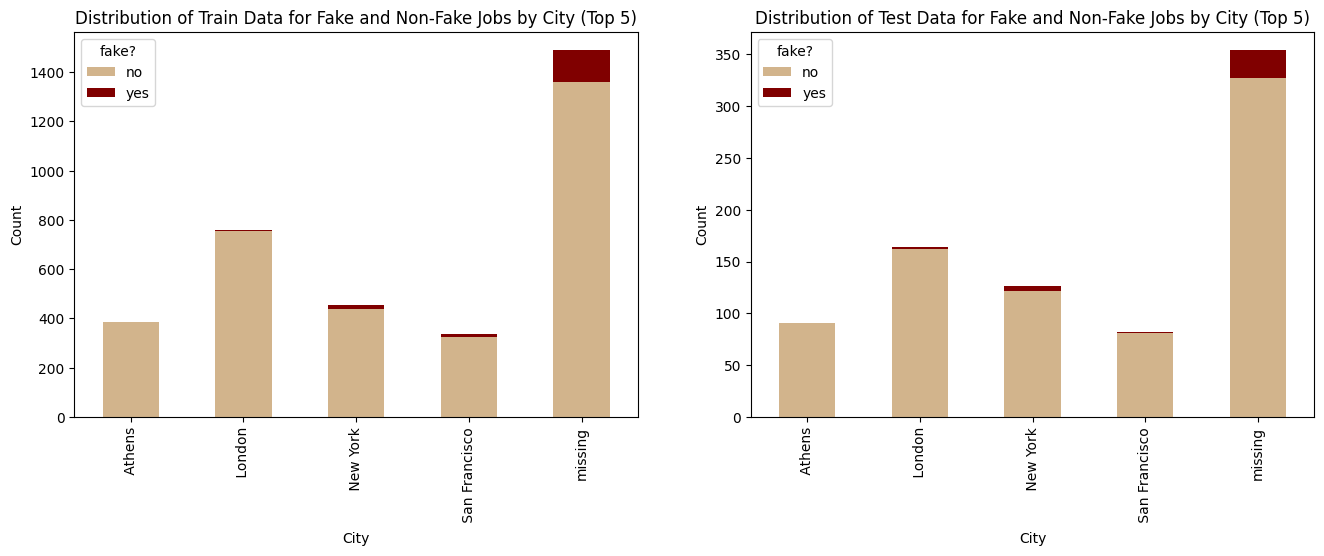

In [21]:
# Get the top 5 city based on the number of job postings
top_cities = TrainDF['city'].value_counts().nlargest(5).index.tolist()

# Create a new DataFrame with only the top 5 countries
train_top_counts = TrainDF.loc[TrainDF['city'].isin(top_cities)].groupby(['city', 'fake?'])['fake?'].count().unstack().fillna(0)
test_top_counts = TestDF.loc[TestDF['city'].isin(top_cities)].groupby(['city', 'fake?'])['fake?'].count().unstack().fillna(0)

colors = {'yes': 'maroon', 'no': 'tan'}

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot the first one
train_top_counts.plot(kind='bar', color=[colors[x] for x in TrainDF['fake?'].unique()], stacked=True, ax=ax1)
ax1.set_xlabel('City')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Train Data for Fake and Non-Fake Jobs by City (Top 5)')

# Plot the second one
test_top_counts.plot(kind='bar', color=[colors[x] for x in TestDF['fake?'].unique()], stacked=True, ax=ax2)
ax2.set_xlabel('City')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Test Data for Fake and Non-Fake Jobs by City (Top 5)')

plt.show()

##### ***Show Data***

In [22]:
TrainDF.describe()

,job title,department,employment_type,experience required,education required,industry,function,fake?,country,state,city,Text Info
count,12626,12626,12626,12626,12626,12626,12626,12626,12626,12626,12626,12626
unique,8453,1089,6,8,14,130,38,2,86,303,1964,11262
top,English Teacher Abroad,missing,Full-time,missing,missing,missing,missing,no,US,missing,missing,We help teachers get safe &amp; secure jobs ab...
freq,216,8100,8199,5020,5780,3498,4591,11936,7475,1819,1489,265


In [23]:
TestDF.describe()

,job title,department,employment_type,experience required,education required,industry,function,fake?,country,state,city,Text Info
count,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190,3190
unique,2487,407,6,8,14,113,38,2,65,190,919,2938
top,English Teacher Abroad,missing,Full-time,missing,missing,missing,missing,no,US,missing,missing,We help teachers get safe &amp; secure jobs ab...
freq,62,2077,2064,1222,1405,836,1118,3023,1955,462,354,76


In [24]:
# Normalizing data
TrainDF['fake?'] = TrainDF['fake?'].replace({'yes': 1, 'no': 0})
TestDF['fake?'] = TestDF['fake?'].replace({'yes': 1, 'no': 0})

##### ***Data after Pre-processing***

In [25]:
# Presenting random data so all attributes are shown clearly
custom = TrainDF.iloc[168:176]
custom.head(8)

,job title,department,employment_type,experience required,education required,industry,function,fake?,country,state,city,Text Info
168,Sr. Application Support Specialist,missing,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,missing,0,US,MN,Minneapolis,Insite Software is looking for smart and motiv...
169,Cruise Staff Wanted *URGENT*,missing,Full-time,missing,missing,"Leisure, Travel & Tourism",missing,1,US,NY,MANHATTAN,6* Ultra Luxury American Cruise Company is urg...
170,Title Insurance & Settlement Sales: Midwestern...,missing,Full-time,Mid-Senior level,missing,Real Estate,Sales,0,US,IL,Chicago,#URL_e7c9057d5e6f097876436d175031e95669ede4eba...
171,Digital Marketing Intern,Marketing,Part-time,Internship,Associate Degree,Marketing and Advertising,Marketing,0,US,AZ,Phoenix,Yazamo is a rapidly growing digital lifecycle ...
172,Product Owner,missing,missing,missing,missing,missing,missing,0,BY,missing,Minsk,Adform is looking for a Product Owner to own t...
173,"Part Time Staff Needed, Weekend Cash Job.",missing,Part-time,missing,missing,missing,missing,1,US,CA,Los Angeles,"Part Time Staff Needed, Weekend Cash Job.You c..."
174,Front-end designer,missing,Part-time,Mid-Senior level,Bachelor's Degree,E-Learning,Design,0,GB,LND,London,Apps for Good (#URL_937118d268463f038aabd86006...
175,BD18 Dental Receptionist Apprenticeship Under ...,missing,Full-time,Not Applicable,High School or equivalent,missing,Administrative,0,missing,missing,missing,Established on the principles that full time e...


In [26]:
# Presenting random data so all attributes are shown clearly
custom = TestDF.iloc[168:176]
custom.head(8)

,job title,department,employment_type,experience required,education required,industry,function,fake?,country,state,city,Text Info
168,Injection Molding Supervisor,missing,Full-time,missing,missing,Management Consulting,missing,0,US,MN,Minneapolis,We Provide Full Time Permanent Positions for m...
169,Full Time Baker Server,Food Service,missing,missing,missing,missing,missing,0,US,FL,Tampa,JOB DESCRIPTIONCookJob Requirements:*Responsib...
170,Front-End/JavaScript Engineer,Frontend,missing,missing,missing,missing,missing,1,ID,JW,Jakarta,Workable is a product-driven software company....
171,Senior Account Manager,Client Service,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Advertising,0,NZ,N,Auckland,Young &amp; Shand is a full service digital ag...
172,Advisor-Inbound Technical,missing,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0,US,WV,Charleston,Delivering superior customer services for over...
173,Technical Support Representative,missing,Full-time,Entry level,High School or equivalent,Information Technology and Services,Information Technology,0,US,NC,Durham,WorkSmart is the leading Managed IT Services c...
174,Customer Support Representative,missing,Full-time,Entry level,Associate Degree,Computer Software,Customer Service,0,US,VA,Richmond,"We're artists, thinkers, and doers in an open,..."
175,Sales Professional,missing,missing,missing,Unspecified,Publishing,Sales,0,US,MA,Woburn,"WDM Group is an innovative, forward thinking d..."


### ***`Text Cleaning`***

##### ***Typo fixing***

In [27]:
# Correct text typo [Takes more than 10 mins]

""" import multiprocessing

def parallelize_dataframe(df, func):
    num_cores = multiprocessing.cpu_count()
    num_partitions = num_cores * 2
    df_split = np.array_split(df, num_partitions)
    pool = multiprocessing.Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

def correct_text(text):
    textblob_object = TextBlob(text)
    corrected_text = str(textblob_object.correct())
    return corrected_text
    
col = ['job title']
for c in col:
    TrainDF[c] = parallelize_dataframe(TrainDF[c], TrainDF[c].apply(correct_text)) """

# Here is an example

def correct_text(text):
    textblob_object = TextBlob(text)
    corrected_text = str(textblob_object.correct())
    return corrected_text

Sentence = 'I go to th8e univirXsity eviryday with my frInds.'
textblob_object = TextBlob(Sentence)
corrected_text = str(textblob_object.correct())
print(corrected_text)


I go to the university everyday with my friends.


##### ***Function for the text***

In [28]:
def clean_text(text):
    
    text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', text) # Add space between a capital letter followed immediately by a lowercase letter (forgotten)
    text = text.lower()                # Lower Text
    text = text.strip()                # Remove extra spaces
    text = re.sub(r'(?<=[a-z,A-Z])\.(?=[a-z,A-Z])', '. ', text) # Add space between a period followed immediately by a lowercase letter or upper (forgotten)
    
    # Removing special characters and tags using regular expressions
    text = re.sub(  
    r'(@\[A-Za-z0-9]+)|'               # Remove mentions (@username)
    r'([^0-9A-Za-z \t]|\w+:\/\/\S+)|'  # Remove URLs (w.. ://..)
    r'^rt|'                            # Remove "rt" character
    r'http[^\s]+ |'                    # Remove URLs starting with "http"
    r'[^\w\s.]|'                       # Remove any non-alphanumeric characters except whitespace and period
    r'â€™|'                            # Replace a specific characters
    r'url[^\s]+ |'                     # Remove "url" starting with "url"
    r'(url\w*\S*)|'                    # Remove "url" with any non-alphanumeric characters except whitespace and period
    r'\d+'                             # Remove any digits
    , '', text )

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(lemmatized_tokens)

    # text = nltk.sent_tokenize(text) // add dot to 2nd re-sub
    return text 

##### ***Function for the rest***

In [29]:
def clean_rest(text):   
    text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', text) # Add space between a capital letter followed immediately by a lowercase letter (forgotten)
    text = text.lower()                # Lower Text
    text = text.strip()                # Remove extra spaces
    
    # Removing special characters and tags using regular expressions
    text = re.sub(  
    r'(@\[A-Za-z0-9]+)|'               # Remove mentions (@username)
    r'([^0-9A-Za-z \t]|\w+:\/\/\S+)|'  # Remove URLs
    r'^rt|'                            # Remove "rt"
    r'http[^\s]+ |'                    # Remove URLs starting with "http"
    r'[^\w\s.]|'                       # Remove any non-alphanumeric characters except whitespace and period
    r'â€™|'                            # Replace a specific characters
    r'url[^\s]+ |'                     # Remove "url"
    r'\d+'                             # Remove any digits
    , '', text )
   
    text = re.sub(r'(?<=[a-z,A-Z])\.(?=[a-z,A-Z])', '. ', text) # Add space between a period followed immediately by a lowercase letter or upper (forgotten)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(lemmatized_tokens)

    return text

##### ***Calling Functions & Represtenation***

In [30]:
# Clean main text for Train
TrainDF['Text Info'] = TrainDF['Text Info'].apply(clean_text)

print(TrainDF['Text Info'])

0        dreamer amp creator creative agency begun mean...
1        eshop buyer charge expanding vendor managing p...
2        consumer track technologycentric internet mark...
3        founded team google london new york office qub...
4        adform premier partner medium agency trading d...
                               ...                        
12786    hello biswajit csi consulting group one client...
12787    reporting crm amp bi director head market rese...
12788    incrediblue busting myth boating rich famous e...
12789    badr established company striding world bigdat...
12790    company seeking part time admin assistant mond...
Name: Text Info, Length: 12626, dtype: object


In [31]:
# Clean main text for Test
TestDF['Text Info'] = TestDF['Text Info'].apply(clean_text)

print(TestDF['Text Info'])

0       seeking qualified candidate fulltime superinte...
1       network closing serviceshas serving lender rea...
2       company ticketscript european market leader di...
3       name must extensive knowledge cm framework lik...
4       come part one fastest growing wellfunded excit...
                              ...                        
3193    proficio mortgage rapidly growing mortgage len...
3194    ultra luxury american cruise company urgently ...
3195    united cerebral palsy oregon amp sw washington...
3196    westview financial service located hampton va ...
3197    office across uk mainland europe australia new...
Name: Text Info, Length: 3190, dtype: object


In [32]:
# Clean rest of the columns
Col = ['job title', 'department', 'employment_type', 'experience required','education required', 'industry', 'function']
for i in Col:
    TrainDF[i] = TrainDF[i].apply(clean_rest)
    TestDF[i] = TestDF[i].apply(clean_rest)

In [33]:
# Lower case text in this columns
def lower_text(text):
    lowered_text = text.lower()
    return lowered_text

Col = ['country', 'state', 'city']
for i in Col:
    TrainDF[i] = TrainDF[i].apply(lower_text)
    TestDF[i] = TestDF[i].apply(lower_text)    

In [34]:
# Present data after Text Cleaning
custom = TrainDF.iloc[168:176]
custom.head(8)

,job title,department,employment_type,experience required,education required,industry,function,fake?,country,state,city,Text Info
168,sr application support specialist,missing,fulltime,midsenior level,bachelor degree,computer software,missing,0,us,mn,minneapolis,insite software looking smart motivated people...
169,cruise staff wanted urgent,missing,fulltime,missing,missing,leisure travel tourism,missing,1,us,ny,manhattan,ultra luxury american cruise company urgently ...
170,title insurance settlement sale midwestern acc...,missing,fulltime,midsenior level,missing,real estate,sale,0,us,il,chicago,well established national settlement service f...
171,digital marketing intern,marketing,parttime,internship,associate degree,marketing and advertising,marketing,0,us,az,phoenix,yazamo rapidly growing digital lifecycle marke...
172,product owner,missing,missing,missing,missing,missing,missing,0,by,missing,minsk,adform looking product owner development adfor...
173,part time staff needed weekend cash job,missing,parttime,missing,missing,missing,missing,1,us,ca,los angeles,part time staff needed weekend cash job home f...
174,frontend designer,missing,parttime,midsenior level,bachelor degree,elearning,design,0,gb,lnd,london,apps good awardwinning technology education mo...
175,bd dental receptionist apprenticeship under na...,missing,fulltime,not applicable,high school or equivalent,missing,administrative,0,missing,missing,missing,established principle full time education ever...


In [35]:
# Present data after Text Cleaning
custom = TestDF.iloc[168:176]
custom.head(8)

,job title,department,employment_type,experience required,education required,industry,function,fake?,country,state,city,Text Info
168,injection molding supervisor,missing,fulltime,missing,missing,management consulting,missing,0,us,mn,minneapolis,provide full time permanent position many medi...
169,full time baker server,food service,missing,missing,missing,missing,missing,0,us,fl,tampa,job descriptioncook job requirementsresponsibl...
170,frontendjava script engineer,frontend,missing,missing,missing,missing,missing,1,id,jw,jakarta,workable productdriven software company thousa...
171,senior account manager,client service,fulltime,midsenior level,bachelor degree,marketing and advertising,advertising,0,nz,n,auckland,young amp shand full service digital agency lo...
172,advisorinbound technical,missing,fulltime,entry level,high school or equivalent,telecommunication,customer service,0,us,wv,charleston,delivering superior customer service year ibex...
173,technical support representative,missing,fulltime,entry level,high school or equivalent,information technology and service,information technology,0,us,nc,durham,work smart leading managed service consulting ...
174,customer support representative,missing,fulltime,entry level,associate degree,computer software,customer service,0,us,va,richmond,artist thinker doer open collaborative challen...
175,sale professional,missing,missing,missing,unspecified,publishing,sale,0,us,ma,woburn,wdm group innovative forward thinking digital ...


In [36]:
# Saving filtered data in csv file for reviewing
TrainDF.to_csv('Filtered_Train_Data.csv', index=False)
TestDF.to_csv('Filtered_Test_Data.csv', index=False)

##### ***World Cloud***

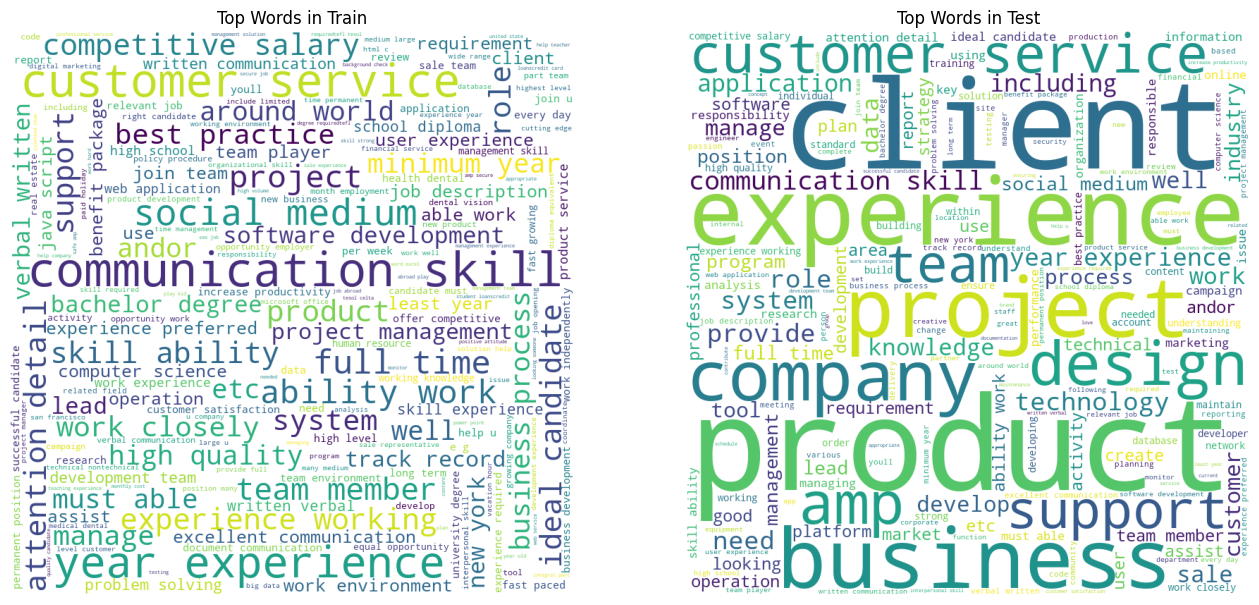

In [37]:
# Generate word clouds
train_data = TrainDF['Text Info'].str.cat(sep=' ')
train_cloud = WordCloud(width=800, height=800, background_color='white').generate(train_data)

test_data = TestDF['Text Info'].str.cat(sep=' ')
test_cloud = WordCloud(width=800, height=800, background_color='white').generate(test_data)

# Plot the word clouds in a single figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,16))

# Plot the training dataset word cloud in the first subplot
ax1.imshow(train_cloud)
ax1.set_title('Top Words in Train')
ax1.axis('off')

# Plot the test dataset word cloud in the second subplot
ax2.imshow(test_cloud)
ax2.set_title('Top Words in Test')
ax2.axis('off')

plt.show()

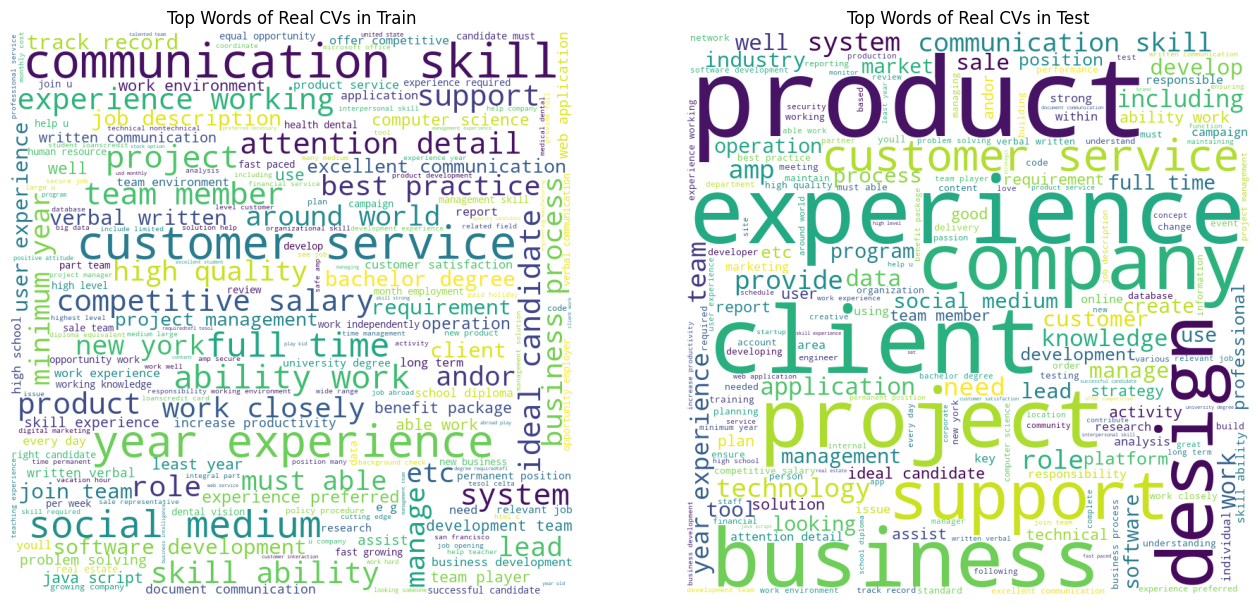

In [38]:
# Generate word clouds
real_train_data = ' '.join(text for text in TrainDF.loc[TrainDF['fake?'] == 0, 'Text Info'])
real_train_cloud = WordCloud(width=800, height=800, background_color='white').generate(real_train_data)

real_test_data = ' '.join(text for text in TestDF.loc[TestDF['fake?'] == 0, 'Text Info'])
real_test_cloud = WordCloud(width=800, height=800, background_color='white').generate(real_test_data)

# Plot the word clouds in a single figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,16))

# Plot the training dataset word cloud in the first subplot
ax1.imshow(real_train_cloud)
ax1.set_title('Top Words of Real CVs in Train')
ax1.axis('off')

# Plot the test dataset word cloud in the second subplot
ax2.imshow(real_test_cloud)
ax2.set_title('Top Words of Real CVs in Test')
ax2.axis('off')

plt.show()

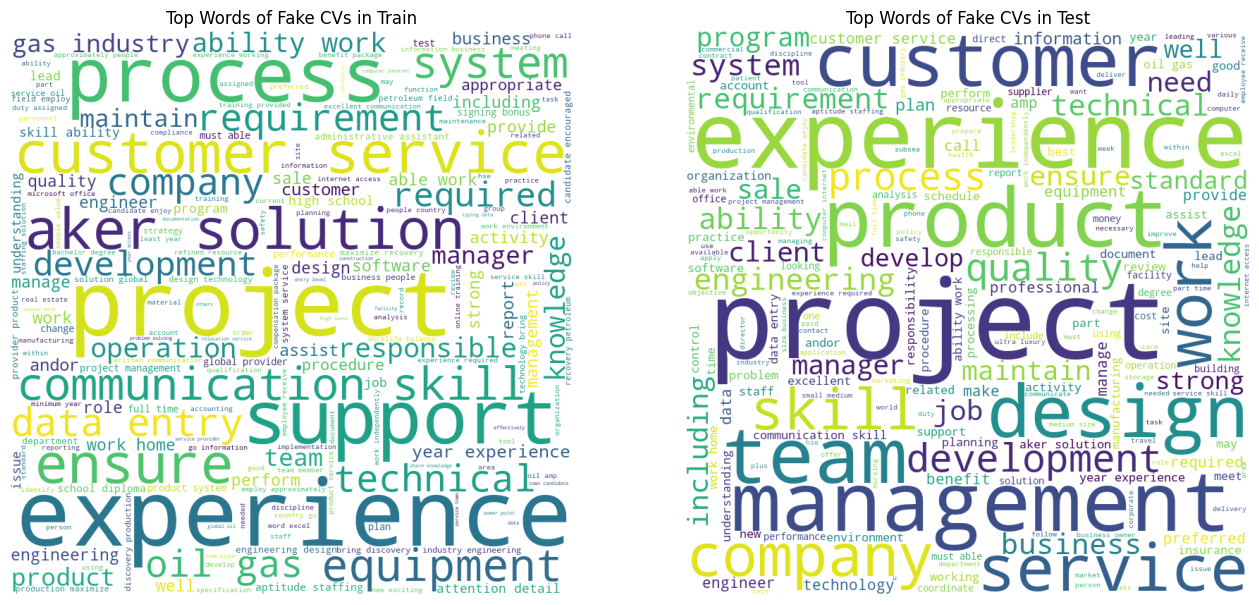

In [39]:
# Generate word clouds
fake_train_data = ' '.join(text for text in TrainDF.loc[TrainDF['fake?'] == 1, 'Text Info'])
fake_train_cloud = WordCloud(width=800, height=800, background_color='white').generate(fake_train_data)

fake_test_data = ' '.join(text for text in TestDF.loc[TestDF['fake?'] == 1, 'Text Info'])
fake_test_cloud = WordCloud(width=800, height=800, background_color='white').generate(fake_test_data)

# Plot the word clouds in a single figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,16))

# Plot the training dataset word cloud in the first subplot
ax1.imshow(fake_train_cloud)
ax1.set_title('Top Words of Fake CVs in Train')
ax1.axis('off')

# Plot the test dataset word cloud in the second subplot
ax2.imshow(fake_test_cloud)
ax2.set_title('Top Words of Fake CVs in Test')
ax2.axis('off')

plt.show()

### ***`Feature Extraction`***

##### ***Tokenization***


In [40]:
# Tokenize the train text data for feature extraction use
TrainDF['Tokens'] = TrainDF['Text Info'].apply(lambda x: word_tokenize(x))
TrainDF['Tokens'].head(5)

0    [dreamer, amp, creator, creative, agency, begu...
1    [eshop, buyer, charge, expanding, vendor, mana...
2    [consumer, track, technologycentric, internet,...
3    [founded, team, google, london, new, york, off...
4    [adform, premier, partner, medium, agency, tra...
Name: Tokens, dtype: object

In [41]:
# Tokenize the test text data for feature extraction use
TestDF['Tokens'] = TestDF['Text Info'].apply(lambda x: word_tokenize(x))
TestDF['Tokens'].head(5)

0    [seeking, qualified, candidate, fulltime, supe...
1    [network, closing, serviceshas, serving, lende...
2    [company, ticketscript, european, market, lead...
3    [name, must, extensive, knowledge, cm, framewo...
4    [come, part, one, fastest, growing, wellfunded...
Name: Tokens, dtype: object

##### ***n-grams***


In [42]:
n = 2 # best parameter for n-grams
TrainDF['ngrams'] = TrainDF['Tokens'].apply(lambda x: [' '.join(x[i:i+n]) for i in range(len(x)-n+1)])

In [43]:
TrainDF['ngrams'].head(5)

0    [dreamer amp, amp creator, creator creative, c...
1    [eshop buyer, buyer charge, charge expanding, ...
2    [consumer track, track technologycentric, tech...
3    [founded team, team google, google london, lon...
4    [adform premier, premier partner, partner medi...
Name: ngrams, dtype: object

In [44]:
n = 2 # best parameter for n-grams
TestDF['ngrams'] = TestDF['Tokens'].apply(lambda x: [' '.join(x[i:i+n]) for i in range(len(x)-n+1)])

In [45]:
TestDF['ngrams'].head(5)

0    [seeking qualified, qualified candidate, candi...
1    [network closing, closing serviceshas, service...
2    [company ticketscript, ticketscript european, ...
3    [name must, must extensive, extensive knowledg...
4    [come part, part one, one fastest, fastest gro...
Name: ngrams, dtype: object

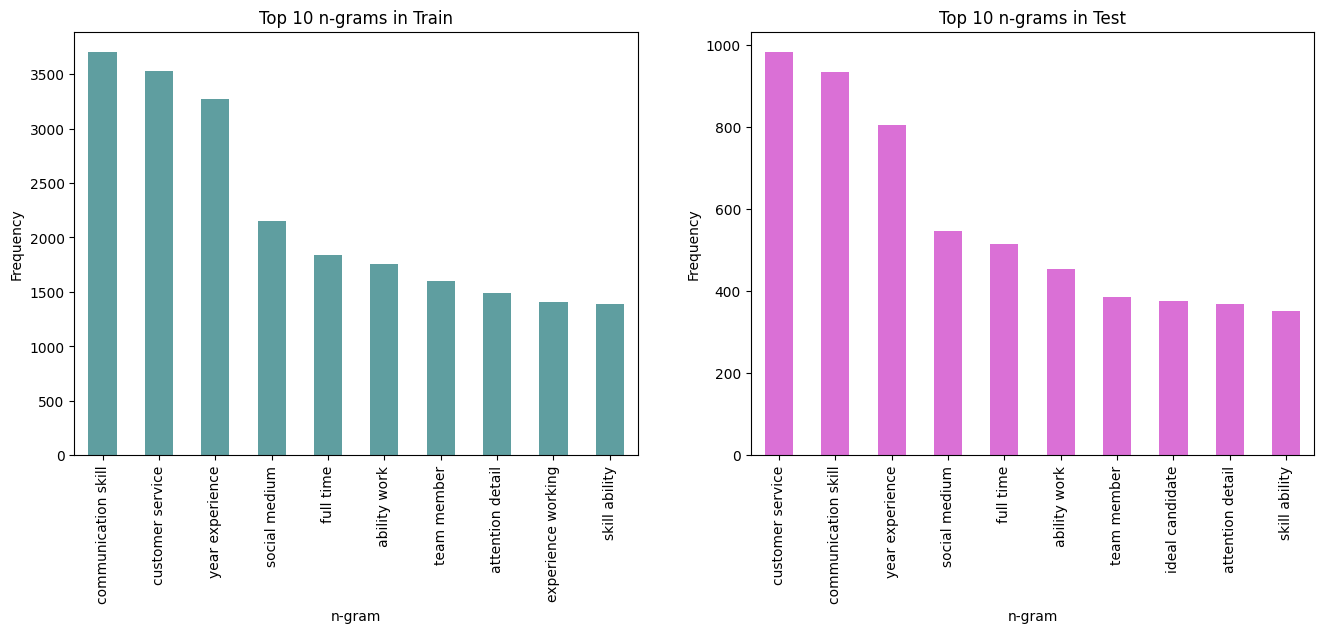

In [46]:
train_ngrams_data = TrainDF['ngrams']
test_ngrams_data = TestDF['ngrams']

# Combine all ngrams into a single list
train_all_ngrams = []
for ngram_list in train_ngrams_data:
    train_all_ngrams.extend(ngram_list)
test_all_ngrams = []
for ngram_list in test_ngrams_data:
    test_all_ngrams.extend(ngram_list)

# Count the occurrences of each ngram
train_ngram_counts = pd.Series(train_all_ngrams).value_counts()
test_ngram_counts = pd.Series(test_all_ngrams).value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5.5))

# Plot the bar chart of the top 10 ngrams for Train
train_ngram_counts[:10].plot(kind='bar', color = 'cadetblue', ax=axs[0])
axs[0].set_title('Top 10 n-grams in Train')
axs[0].set_xlabel('n-gram')
axs[0].set_ylabel('Frequency')

# Plot the bar chart of the top 10 ngrams for Test
test_ngram_counts[:10].plot(kind='bar', color = 'orchid', ax=axs[1])
axs[1].set_title('Top 10 n-grams in Test')
axs[1].set_xlabel('n-gram')
axs[1].set_ylabel('Frequency')

plt.show()


##### ***Bag of words***

In [47]:
TrainDF['BOW'] = TrainDF['Tokens'].apply(lambda x: Counter(' '.join(x).split(" ")))

In [48]:
TrainDF['BOW'].head(5)

0    {'dreamer': 1, 'amp': 2, 'creator': 2, 'creati...
1    {'eshop': 1, 'buyer': 1, 'charge': 1, 'expandi...
2    {'consumer': 2, 'track': 2, 'technologycentric...
3    {'founded': 2, 'team': 3, 'google': 2, 'london...
4    {'adform': 7, 'premier': 1, 'partner': 1, 'med...
Name: BOW, dtype: object

In [49]:
TestDF['BOW'] = TestDF['Tokens'].apply(lambda x: Counter(' '.join(x).split(" ")))

In [50]:
TestDF['BOW'].head(5)

0    {'seeking': 1, 'qualified': 1, 'candidate': 1,...
1    {'network': 1, 'closing': 13, 'serviceshas': 2...
2    {'company': 3, 'ticketscript': 2, 'european': ...
3    {'name': 1, 'must': 1, 'extensive': 2, 'knowle...
4    {'come': 2, 'part': 1, 'one': 2, 'fastest': 1,...
Name: BOW, dtype: object

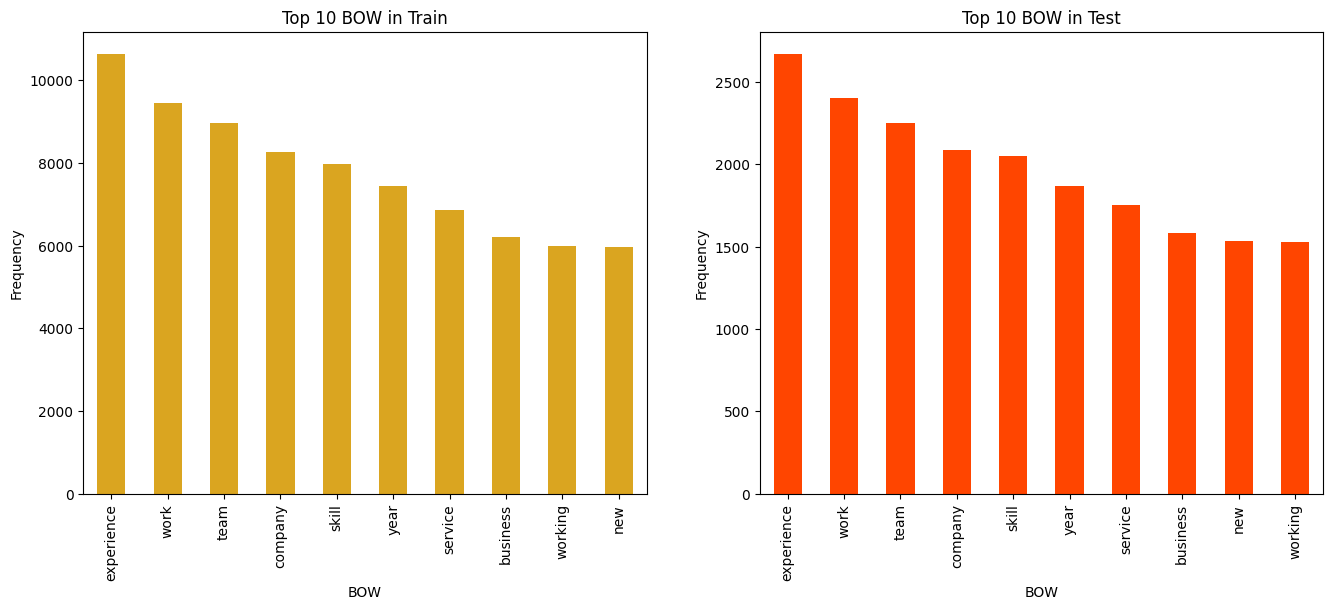

In [51]:
train_ngrams_data = TrainDF['BOW']
test_ngrams_data = TestDF['BOW']

# Combine all ngrams into a single list
train_all_ngrams = []
for ngram_list in train_ngrams_data:
    train_all_ngrams.extend(ngram_list)
test_all_ngrams = []
for ngram_list in test_ngrams_data:
    test_all_ngrams.extend(ngram_list)

# Count the occurrences of each ngram
train_ngram_counts = pd.Series(train_all_ngrams).value_counts()
test_ngram_counts = pd.Series(test_all_ngrams).value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the bar chart of the top 10 ngrams for Train
train_ngram_counts[:10].plot(kind='bar', color = 'goldenrod', ax=axs[0])
axs[0].set_title('Top 10 BOW in Train')
axs[0].set_xlabel('BOW')
axs[0].set_ylabel('Frequency')

# Plot the bar chart of the top 10 ngrams for Test
test_ngram_counts[:10].plot(kind='bar', color = 'orangered', ax=axs[1])
axs[1].set_title('Top 10 BOW in Test')
axs[1].set_xlabel('BOW')
axs[1].set_ylabel('Frequency')

plt.show()

##### ***TF-IDF***

In [52]:
vectorizer = TfidfVectorizer()
tfidf_features_Train = vectorizer.fit_transform([' '.join(text) for text in TrainDF['Tokens']])
tfidf_features_Train.shape

(12626, 76798)

In [53]:
print(tfidf_features_Train)

  (0, 17728)	0.029746767796995092
  (0, 5434)	0.0340487705914906
  (0, 28855)	0.02532798376825085
  (0, 30544)	0.02741555692352392
  (0, 33039)	0.037661074262112806
  (0, 148)	0.02565839179862254
  (0, 12129)	0.057346481634265103
  (0, 12289)	0.03972589034044539
  (0, 57950)	0.050324642296941675
  (0, 67389)	0.058004616841773535
  (0, 73275)	0.032907190197917664
  (0, 8499)	0.03817026276055983
  (0, 122)	0.019845694131952373
  (0, 67996)	0.06805481995896387
  (0, 65082)	0.043194676131212334
  (0, 28560)	0.027055199106735876
  (0, 49847)	0.05794313784320564
  (0, 19110)	0.08219050354285838
  (0, 62270)	0.10312607950724861
  (0, 15765)	0.046824342844730395
  (0, 65451)	0.0993945788028913
  (0, 49654)	0.06609402790936628
  (0, 25460)	0.09547688727442916
  (0, 48427)	0.03234463429402048
  (0, 28020)	0.056561906024379466
  :	:
  (12625, 24618)	0.11053785014931546
  (12625, 43167)	0.06581611374107091
  (12625, 39521)	0.0551310440953746
  (12625, 46403)	0.043906160173259476
  (12625, 13629)	0

In [54]:
tfidf_features_Test = vectorizer.transform([' '.join(text) for text in TestDF['Tokens']])
tfidf_features_Test.shape

(3190, 76798)

In [55]:
print(tfidf_features_Test)

  (0, 76128)	0.06601918790886734
  (0, 75437)	0.03775176739729259
  (0, 75280)	0.06836019945879648
  (0, 74821)	0.08193974428582411
  (0, 74489)	0.14650605547386392
  (0, 74318)	0.04596752125095007
  (0, 73818)	0.1141907348309037
  (0, 73275)	0.06443540792977404
  (0, 72773)	0.09489364467932111
  (0, 72582)	0.05945524156198486
  (0, 72250)	0.053479369850545855
  (0, 70575)	0.06266000304695588
  (0, 69788)	0.05536975386570624
  (0, 69120)	0.21069214927597776
  (0, 69092)	0.10567906828587806
  (0, 66065)	0.04621192743169335
  (0, 65970)	0.088174731929828
  (0, 65961)	0.1204900525727882
  (0, 65931)	0.15887731579348507
  (0, 65667)	0.056656301840911936
  (0, 62300)	0.0630383014247977
  (0, 62275)	0.20193067111723084
  (0, 61833)	0.0839574145251379
  (0, 61749)	0.10263718963463021
  (0, 60593)	0.06285534810858183
  :	:
  (3189, 9579)	0.025994478789368638
  (3189, 9567)	0.10034349061917194
  (3189, 9558)	0.1275444182413342
  (3189, 9455)	0.10209019889313091
  (3189, 8919)	0.0895743921520942

##### ***Part of Speech***

In [56]:
TrainDF['POS'] = TrainDF['Tokens'].apply(nltk.pos_tag)

In [57]:
TrainDF['POS'].head(5)

0    [(dreamer, NN), (amp, NN), (creator, NN), (cre...
1    [(eshop, NN), (buyer, NN), (charge, NN), (expa...
2    [(consumer, NN), (track, NN), (technologycentr...
3    [(founded, VBN), (team, NN), (google, NN), (lo...
4    [(adform, RB), (premier, JJ), (partner, NN), (...
Name: POS, dtype: object

In [58]:
TestDF['POS'] = TestDF['Tokens'].apply(nltk.pos_tag)

In [59]:
TestDF['POS'].head(5)

0    [(seeking, VBG), (qualified, JJ), (candidate, ...
1    [(network, NN), (closing, NN), (serviceshas, N...
2    [(company, NN), (ticketscript, JJ), (european,...
3    [(name, NN), (must, MD), (extensive, VB), (kno...
4    [(come, VB), (part, NN), (one, CD), (fastest, ...
Name: POS, dtype: object

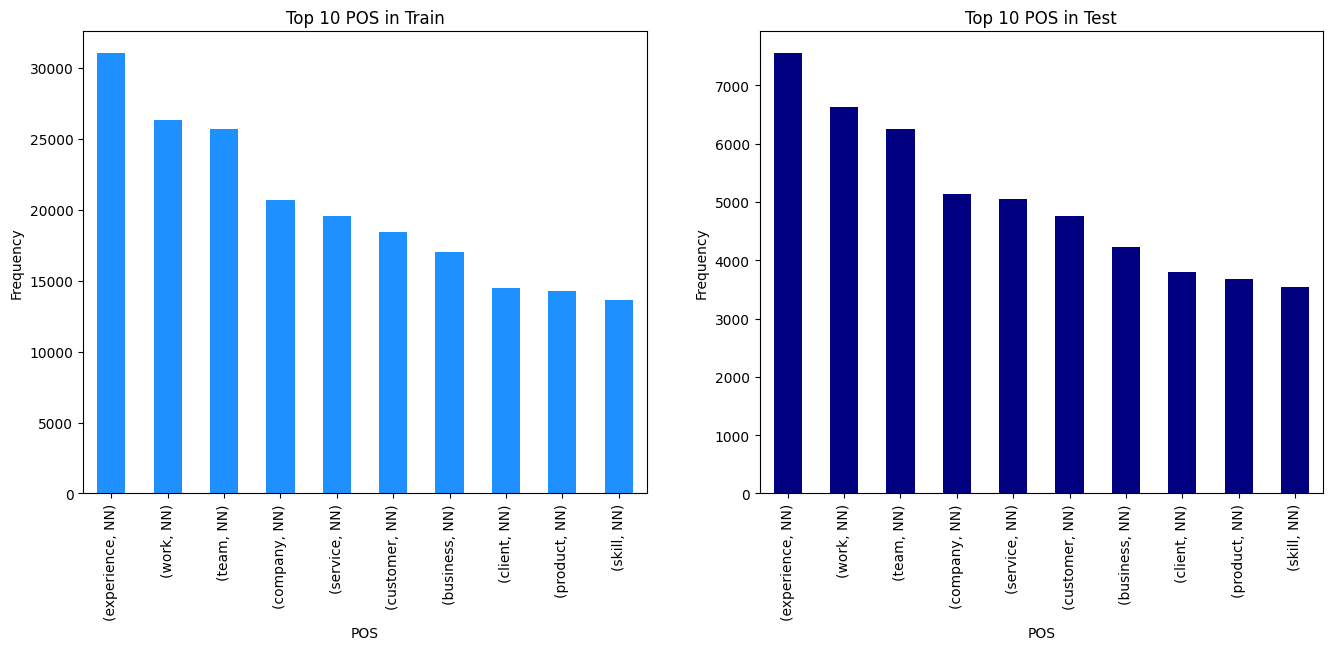

In [60]:
# Load the ngrams data from TrainDF and TestDF
train_ngrams_data = TrainDF['POS']
test_ngrams_data = TestDF['POS']

# Combine all ngrams into a single list for each dataset
train_all_ngrams = []
for ngram_list in train_ngrams_data:
    train_all_ngrams.extend(ngram_list)
test_all_ngrams = []
for ngram_list in test_ngrams_data:
    test_all_ngrams.extend(ngram_list)

# Create a Pandas Series from the ngrams list and count the occurrences of each ngram for each dataset
train_ngram_counts = pd.Series(train_all_ngrams).value_counts()
test_ngram_counts = pd.Series(test_all_ngrams).value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the bar chart of the top 10 ngrams for TrainDF in the first subplot
train_ngram_counts[:10].plot(kind='bar', color = 'dodgerblue', ax=axs[0])
axs[0].set_title('Top 10 POS in Train')
axs[0].set_xlabel('POS')
axs[0].set_ylabel('Frequency')

# Plot the bar chart of the top 10 ngrams for TestDF in the second subplot
test_ngram_counts[:10].plot(kind='bar', color = 'navy', ax=axs[1])
axs[1].set_title('Top 10 POS in Test')
axs[1].set_xlabel('POS')
axs[1].set_ylabel('Frequency')

# Set the layout and show the figure
plt.show()

##### ***Save Data***

In [61]:
# Saving data in csv file to review
TrainDF.to_csv('Feature_Extraction_Train_Data.csv', index=False)
TestDF.to_csv('Feature_Extraction_Test_Data.csv', index=False)

### ***`Modeling`***

#### ***Logistic Regression***

##### *n-grams*

In [62]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['ngrams'].apply(lambda x: ' '.join(x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('ngrams Logistic Regression Train & Validation')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

ngrams Logistic Regression Train & Validation
Accuracy: 97.82 %
Precision: 91.47 %
Recall: 72.84 %
F1 score: 81.1 %
Confusion matrix:
 [[2353   11]
 [  44  118]]


In [63]:
TestX = vectorizer.transform(TestDF['ngrams'].apply(lambda x: ' '.join(x)))
TestY = TestDF['fake?']

y_pred = clf.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('ngrams Logistic Regression Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

ngrams Logistic Regression Test
Accuracy: 98.06 %
Precision: 89.47 %
Recall: 71.26 %
F1 score: 79.33 %
Confusion matrix:
 [[3009   14]
 [  48  119]]


##### *BOW*

In [64]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['BOW'].apply(lambda x: ' '.join(x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('BOW Logistic Regression Train & Validation')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

BOW Logistic Regression Train & Validation
Accuracy: 98.02 %
Precision: 95.9 %
Recall: 72.22 %
F1 score: 82.39 %
Confusion matrix:
 [[2359    5]
 [  45  117]]


In [65]:
TestX = vectorizer.transform(TestDF['BOW'].apply(lambda x: ' '.join(x)))
TestY = TestDF['fake?']

y_pred = clf.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('BOW Logistic Regression Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

BOW Logistic Regression Test
Accuracy: 98.12 %
Precision: 93.5 %
Recall: 68.86 %
F1 score: 79.31 %
Confusion matrix:
 [[3015    8]
 [  52  115]]


##### *TF-IDF*

In [66]:
TrainX = tfidf_features_Train
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('TF-IDF Logistic Regression Train & Validation')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

TF-IDF Logistic Regression Train & Validation
Accuracy: 95.37 %
Precision: 97.87 %
Recall: 28.4 %
F1 score: 44.02 %
Confusion matrix:
 [[2363    1]
 [ 116   46]]


In [67]:
TestX = tfidf_features_Test
TestY = TestDF['fake?']

y_pred = clf.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('TF-IDF Logistic Regression Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

TF-IDF Logistic Regression Test
Accuracy: 96.49 %
Precision: 100.0 %
Recall: 32.93 %
F1 score: 49.55 %
Confusion matrix:
 [[3023    0]
 [ 112   55]]


##### *POS*

In [68]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['POS'].apply(lambda x: ' '.join(t[0] for t in x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('POS Logistic Regression Train & Validation')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

POS Logistic Regression Train & Validation
Accuracy: 97.51 %
Precision: 88.98 %
Recall: 69.75 %
F1 score: 78.2 %
Confusion matrix:
 [[2350   14]
 [  49  113]]


In [69]:
TestX = vectorizer.transform(TestDF['POS'].apply(lambda x: ' '.join(t[0] for t in x)))
TestY = TestDF['fake?']

y_pred = clf.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('POS Logistic Regression Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

POS Logistic Regression Test
Accuracy: 98.12 %
Precision: 93.5 %
Recall: 68.86 %
F1 score: 79.31 %
Confusion matrix:
 [[3015    8]
 [  52  115]]


#### ***Random Forest***

##### *n-grams*

In [70]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['ngrams'].apply(lambda x: ' '.join(x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)
# Create a Random Forest model
rfc = RandomForestClassifier()

# Train the model
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('ngrams Random Forest Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)


ngrams Random Forest Train & Validate
Accuracy: 97.43 %
Precision: 98.02 %
Recall: 61.11 %
F1 score: 75.29 %
Confusion matrix:
 [[2362    2]
 [  63   99]]


In [71]:
TestX = vectorizer.transform(TestDF['ngrams'].apply(lambda x: ' '.join(x)))
TestY = TestDF['fake?']

y_pred = rfc.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('ngrams Random Forest Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)


ngrams Random Forest Test
Accuracy: 98.09 %
Precision: 99.07 %
Recall: 64.07 %
F1 score: 77.82 %
Confusion matrix:
 [[3022    1]
 [  60  107]]


##### *BOW*

In [72]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['BOW'].apply(lambda x: ' '.join(x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)
# Create a Random Forest model
rfc = RandomForestClassifier()

# Train the model
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('BOW Random Forest Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)


BOW Random Forest Train & Validate
Accuracy: 97.43 %
Precision: 100.0 %
Recall: 59.88 %
F1 score: 74.9 %
Confusion matrix:
 [[2364    0]
 [  65   97]]


In [73]:
TestX = vectorizer.transform(TestDF['BOW'].apply(lambda x: ' '.join(x)))
TestY = TestDF['fake?']

y_pred = rfc.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('BOW Random Forest Test & Evaluate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)


BOW Random Forest Test & Evaluate
Accuracy: 98.09 %
Precision: 99.07 %
Recall: 64.07 %
F1 score: 77.82 %
Confusion matrix:
 [[3022    1]
 [  60  107]]


##### *TF-IDF*

In [74]:
TrainX = tfidf_features_Train
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)
rfc = RandomForestClassifier()

# Train the model
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('TF-IDF Random Forest Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

TF-IDF Random Forest Train & Validate
Accuracy: 97.55 %
Precision: 100.0 %
Recall: 61.73 %
F1 score: 76.34 %
Confusion matrix:
 [[2364    0]
 [  62  100]]


In [75]:
TestX = tfidf_features_Test
TestY = TestDF['fake?']

y_pred = rfc.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('TF-IDF Random Forest Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

TF-IDF Random Forest Test
Accuracy: 97.93 %
Precision: 100.0 %
Recall: 60.48 %
F1 score: 75.37 %
Confusion matrix:
 [[3023    0]
 [  66  101]]


##### *POS*

In [76]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['POS'].apply(lambda x: ' '.join(t[0] for t in x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('POS Random Forest Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

POS Random Forest Train & Validate
Accuracy: 97.55 %
Precision: 100.0 %
Recall: 61.73 %
F1 score: 76.34 %
Confusion matrix:
 [[2364    0]
 [  62  100]]


In [77]:
TestX = vectorizer.transform(TestDF['POS'].apply(lambda x: ' '.join(t[0] for t in x)))
TestY = TestDF['fake?']

y_pred = rfc.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('POS Random Forest Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

POS Random Forest Test
Accuracy: 98.09 %
Precision: 100.0 %
Recall: 63.47 %
F1 score: 77.66 %
Confusion matrix:
 [[3023    0]
 [  61  106]]


#### ***CNN***

##### *n-grams*

In [78]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['ngrams'].apply(lambda x: ' '.join(x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

# Convert sparse matrix to dense matrix
X_train_DN = X_train.toarray()
X_test_DN = X_test.toarray()

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_DN, y_train, validation_data=(X_test_DN, y_test), epochs=10, batch_size=100)

y_pred = model.predict(X_test_DN)


Epoch 1/10
101/101 [==============================] - 13s 128ms/step - loss: 0.1224 - accuracy: 0.9552 - val_loss: 0.0877 - val_accuracy: 0.9727
Epoch 2/10
101/101 [==============================] - 14s 134ms/step - loss: 0.0296 - accuracy: 0.9935 - val_loss: 0.0777 - val_accuracy: 0.9782
Epoch 3/10
101/101 [==============================] - 10s 100ms/step - loss: 0.0108 - accuracy: 0.9983 - val_loss: 0.0785 - val_accuracy: 0.9802
Epoch 4/10
101/101 [==============================] - 10s 99ms/step - loss: 0.0053 - accuracy: 0.9995 - val_loss: 0.0960 - val_accuracy: 0.9794
Epoch 5/10
101/101 [==============================] - 11s 106ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.1043 - val_accuracy: 0.9794
Epoch 6/10
101/101 [==============================] - 15s 146ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.1049 - val_accuracy: 0.9798
Epoch 7/10
101/101 [==============================] - 11s 112ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0988 - val_acc

In [79]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_DN, y_test)
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
confusion = confusion_matrix(y_test, y_pred.round())

print('n-grams CNN Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

del X_train_DN
del X_test_DN
gc.collect()

79/79 [==============================] - 1s 13ms/step - loss: 0.1031 - accuracy: 0.9818
n-grams CNN Train & Validate
Accuracy: 98.18 %
Precision: 90.85 %
Recall: 79.63 %
F1 score: 84.87 %
Confusion matrix:
 [[2351   13]
 [  33  129]]


3026

In [80]:
# Test the model
TestX = vectorizer.transform(TestDF['ngrams'].apply(lambda x: ' '.join(x)))
TestY = TestDF['fake?']

# Convert sparse matrix to dense matrix
X_test_DN = TestX.toarray()

y_pred = model.predict(X_test_DN)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_DN, TestY)
precision = precision_score(TestY, y_pred.round())
recall = recall_score(TestY, y_pred.round())
f1 = f1_score(TestY, y_pred.round())
confusion = confusion_matrix(TestY, y_pred.round())

print('n-grams CNN Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

del X_test_DN
gc.collect()


100/100 [==============================] - 1s 12ms/step - loss: 0.0944 - accuracy: 0.9840
n-grams CNN Test
Accuracy: 98.4 %
Precision: 90.85 %
Recall: 77.25 %
F1 score: 83.5 %
Confusion matrix:
 [[3010   13]
 [  38  129]]


1495

##### *BOW*

In [102]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['BOW'].apply(lambda x: ' '.join(x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

# Convert sparse matrix to dense matrix
X_train_BN = X_train.toarray()
X_test_BN = X_test.toarray()

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_BN, y_train, validation_data=(X_test_BN, y_test), epochs=10, batch_size=100)

y_pred = model.predict(X_test_BN)

Epoch 1/10
101/101 [==============================] - 10s 96ms/step - loss: 0.1423 - accuracy: 0.9436 - val_loss: 0.1020 - val_accuracy: 0.9359
Epoch 2/10
101/101 [==============================] - 9s 93ms/step - loss: 0.0585 - accuracy: 0.9686 - val_loss: 0.0933 - val_accuracy: 0.9723
Epoch 3/10
101/101 [==============================] - 9s 93ms/step - loss: 0.0431 - accuracy: 0.9901 - val_loss: 0.1025 - val_accuracy: 0.9735
Epoch 4/10
101/101 [==============================] - 9s 92ms/step - loss: 0.0378 - accuracy: 0.9960 - val_loss: 0.1041 - val_accuracy: 0.9755
Epoch 5/10
101/101 [==============================] - 9s 92ms/step - loss: 0.0335 - accuracy: 0.9992 - val_loss: 0.0859 - val_accuracy: 0.9790
Epoch 6/10
101/101 [==============================] - 9s 92ms/step - loss: 0.0094 - accuracy: 0.9995 - val_loss: 0.0714 - val_accuracy: 0.9794
Epoch 7/10
101/101 [==============================] - 9s 91ms/step - loss: 0.0045 - accuracy: 0.9995 - val_loss: 0.0828 - val_accuracy: 0.980

In [103]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_BN, y_test)
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
confusion = confusion_matrix(y_test, y_pred.round())

print('BOW CNN Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

del X_train_BN
del X_test_BN
gc.collect()

79/79 [==============================] - 1s 14ms/step - loss: 0.0845 - accuracy: 0.9794
BOW CNN Train & Validate
Accuracy: 97.94 %
Precision: 93.65 %
Recall: 72.84 %
F1 score: 81.94 %
Confusion matrix:
 [[2356    8]
 [  44  118]]


4898

In [104]:
# Test the model
TestX = vectorizer.transform(TestDF['BOW'].apply(lambda x: ' '.join(x)))
TestY = TestDF['fake?']

# Convert sparse matrix to dense matrix
X_test_BN = TestX.toarray()

y_pred = model.predict(X_test_BN)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_BN, TestY)
precision = precision_score(TestY, y_pred.round())
recall = recall_score(TestY, y_pred.round())
f1 = f1_score(TestY, y_pred.round())
confusion = confusion_matrix(TestY, y_pred.round())

print('BOW CNN Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

del X_test_BN
gc.collect()

100/100 [==============================] - 1s 14ms/step - loss: 0.0740 - accuracy: 0.9828
BOW CNN Test
Accuracy: 98.28 %
Precision: 93.75 %
Recall: 71.86 %
F1 score: 81.36 %
Confusion matrix:
 [[3015    8]
 [  47  120]]


1495

##### *TF_IDF*

In [84]:
vectorizer = CountVectorizer()
TrainX = tfidf_features_Train
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

# Convert sparse matrix to dense matrix
X_train_TN = X_train.toarray()
X_test_TN = X_test.toarray()

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_TN, y_train, validation_data=(X_test_TN, y_test), epochs=10, batch_size=100)

y_pred = model.predict(X_test_TN)

Epoch 1/10
101/101 [==============================] - 10s 89ms/step - loss: 0.2636 - accuracy: 0.9444 - val_loss: 0.1867 - val_accuracy: 0.9359
Epoch 2/10
101/101 [==============================] - 8s 83ms/step - loss: 0.1239 - accuracy: 0.9518 - val_loss: 0.1347 - val_accuracy: 0.9470
Epoch 3/10
101/101 [==============================] - 8s 82ms/step - loss: 0.0760 - accuracy: 0.9713 - val_loss: 0.0902 - val_accuracy: 0.9667
Epoch 4/10
101/101 [==============================] - 9s 85ms/step - loss: 0.0393 - accuracy: 0.9889 - val_loss: 0.0695 - val_accuracy: 0.9762
Epoch 5/10
101/101 [==============================] - 9s 84ms/step - loss: 0.0214 - accuracy: 0.9958 - val_loss: 0.0623 - val_accuracy: 0.9802
Epoch 6/10
101/101 [==============================] - 8s 76ms/step - loss: 0.0127 - accuracy: 0.9987 - val_loss: 0.0603 - val_accuracy: 0.9810
Epoch 7/10
101/101 [==============================] - 8s 74ms/step - loss: 0.0081 - accuracy: 0.9992 - val_loss: 0.0591 - val_accuracy: 0.981

In [85]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_TN, y_test)
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
confusion = confusion_matrix(y_test, y_pred.round())

print('TF-IDF CNN Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

del X_train_TN
del X_test_TN
gc.collect()

79/79 [==============================] - 1s 7ms/step - loss: 0.0608 - accuracy: 0.9810
TF-IDF CNN Train & Validate
Accuracy: 98.1 %
Precision: 95.97 %
Recall: 73.46 %
F1 score: 83.22 %
Confusion matrix:
 [[2359    5]
 [  43  119]]


4380

In [86]:
# Test the model
TestX = tfidf_features_Test
TestY = TestDF['fake?']

# Convert sparse matrix to dense matrix
X_test_TN = TestX.toarray()

y_pred = model.predict(X_test_TN)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_TN, TestY)
precision = precision_score(TestY, y_pred.round())
recall = recall_score(TestY, y_pred.round())
f1 = f1_score(TestY, y_pred.round())
confusion = confusion_matrix(TestY, y_pred.round())

print('TF-IDF CNN Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

del X_test_TN
gc.collect()

100/100 [==============================] - 1s 7ms/step - loss: 0.0547 - accuracy: 0.9834
TF-IDF CNN Test
Accuracy: 98.34 %
Precision: 95.97 %
Recall: 71.26 %
F1 score: 81.79 %
Confusion matrix:
 [[3018    5]
 [  48  119]]


1487

##### *POS*

In [87]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['POS'].apply(lambda x: ' '.join(t[0] for t in x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

# Convert sparse matrix to dense matrix
X_train_PN = X_train.toarray()
X_test_PN = X_test.toarray()

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_PN, y_train, validation_data=(X_test_PN, y_test), epochs=10, batch_size=100)

y_pred = model.predict(X_test_PN)

Epoch 1/10
101/101 [==============================] - 10s 97ms/step - loss: 0.1464 - accuracy: 0.9417 - val_loss: 0.1022 - val_accuracy: 0.9359
Epoch 2/10
101/101 [==============================] - 10s 95ms/step - loss: 0.0614 - accuracy: 0.9637 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 3/10
101/101 [==============================] - 10s 94ms/step - loss: 0.0449 - accuracy: 0.9894 - val_loss: 0.0967 - val_accuracy: 0.9747
Epoch 4/10
101/101 [==============================] - 10s 97ms/step - loss: 0.0190 - accuracy: 0.9980 - val_loss: 0.0724 - val_accuracy: 0.9774
Epoch 5/10
101/101 [==============================] - 10s 96ms/step - loss: 0.0081 - accuracy: 0.9992 - val_loss: 0.0734 - val_accuracy: 0.9794
Epoch 6/10
101/101 [==============================] - 10s 95ms/step - loss: 0.0050 - accuracy: 0.9994 - val_loss: 0.0850 - val_accuracy: 0.9782
Epoch 7/10
101/101 [==============================] - 10s 95ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.0865 - val_accuracy:

In [88]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_PN, y_test)
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
confusion = confusion_matrix(y_test, y_pred.round())

print('n-grams CNN Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

del X_train_PN
del X_test_PN
gc.collect()

79/79 [==============================] - 1s 14ms/step - loss: 0.0924 - accuracy: 0.9798
n-grams CNN Train & Validate
Accuracy: 97.98 %
Precision: 93.7 %
Recall: 73.46 %
F1 score: 82.35 %
Confusion matrix:
 [[2356    8]
 [  43  119]]


4514

In [89]:
# Test the model
TestX = vectorizer.transform(TestDF['POS'].apply(lambda x: ' '.join(t[0] for t in x)))
TestY = TestDF['fake?']

# Convert sparse matrix to dense matrix
X_test_PN = TestX.toarray()

y_pred = model.predict(X_test_PN)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_PN, TestY)
precision = precision_score(TestY, y_pred.round())
recall = recall_score(TestY, y_pred.round())
f1 = f1_score(TestY, y_pred.round())
confusion = confusion_matrix(TestY, y_pred.round())

print('n-grams CNN Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

del X_test_PN
gc.collect()

100/100 [==============================] - 1s 13ms/step - loss: 0.0881 - accuracy: 0.9824
n-grams CNN Test
Accuracy: 98.24 %
Precision: 94.4 %
Recall: 70.66 %
F1 score: 80.82 %
Confusion matrix:
 [[3016    7]
 [  49  118]]


1506

#### ***SVM***

##### *ngrams*

In [90]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['ngrams'].apply(lambda x: ' '.join(x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('ngrams SVM Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

ngrams SVM Train & Validate
Accuracy: 96.99 %
Precision: 77.56 %
Recall: 74.69 %
F1 score: 76.1 %
Confusion matrix:
 [[2329   35]
 [  41  121]]


In [91]:
TestX = vectorizer.transform(TestDF['ngrams'].apply(lambda x: ' '.join(x)))
TestY = TestDF['fake?']

y_pred = clf.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('ngrams SVM Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

ngrams SVM Test
Accuracy: 97.34 %
Precision: 73.84 %
Recall: 76.05 %
F1 score: 74.93 %
Confusion matrix:
 [[2978   45]
 [  40  127]]


##### *BOW*

In [92]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['BOW'].apply(lambda x: ' '.join(x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('BOW SVM Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

BOW SVM Train & Validate
Accuracy: 97.55 %
Precision: 84.72 %
Recall: 75.31 %
F1 score: 79.74 %
Confusion matrix:
 [[2342   22]
 [  40  122]]


In [93]:
TestX = vectorizer.transform(TestDF['BOW'].apply(lambda x: ' '.join(x)))
TestY = TestDF['fake?']

y_pred = clf.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('BOW SVM Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

BOW SVM Test
Accuracy: 98.09 %
Precision: 88.97 %
Recall: 72.46 %
F1 score: 79.87 %
Confusion matrix:
 [[3008   15]
 [  46  121]]


##### *TF-IDF*

In [94]:
TrainX = tfidf_features_Train
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('TF-IDF SVM Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

TF-IDF SVM Train & Validate
Accuracy: 97.55 %
Precision: 97.17 %
Recall: 63.58 %
F1 score: 76.87 %
Confusion matrix:
 [[2361    3]
 [  59  103]]


In [95]:
TestX = tfidf_features_Test
TestY = TestDF['fake?']

y_pred = clf.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('TF-IDF SVM Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

TF-IDF SVM Test
Accuracy: 98.24 %
Precision: 98.26 %
Recall: 67.66 %
F1 score: 80.14 %
Confusion matrix:
 [[3021    2]
 [  54  113]]


##### *POS*

In [96]:
vectorizer = CountVectorizer()
TrainX = vectorizer.fit_transform(TrainDF['POS'].apply(lambda x: ' '.join(t[0] for t in x)))
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('POS SVM Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

POS SVM Train & Validate
Accuracy: 97.35 %
Precision: 82.31 %
Recall: 74.69 %
F1 score: 78.32 %
Confusion matrix:
 [[2338   26]
 [  41  121]]


In [97]:
TestX = vectorizer.transform(TestDF['POS'].apply(lambda x: ' '.join(t[0] for t in x)))
TestY = TestDF['fake?']

y_pred = clf.predict(TestX)

accuracy = accuracy_score(TestY, y_pred)
precision = precision_score(TestY, y_pred)
recall = recall_score(TestY, y_pred)
f1 = f1_score(TestY, y_pred)
confusion = confusion_matrix(TestY, y_pred)

print('POS SVM Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

POS SVM Test
Accuracy: 97.71 %
Precision: 81.76 %
Recall: 72.46 %
F1 score: 76.83 %
Confusion matrix:
 [[2996   27]
 [  46  121]]


### ***`Evaluation`***

##### Best Model is " CNN " with combination with " TF-IDF "

In [98]:
vectorizer = CountVectorizer()
TrainX = tfidf_features_Train
TrainY = TrainDF['fake?']
X_train, X_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=42)

# Convert sparse matrix to dense matrix
X_train_TN = X_train.toarray()
X_test_TN = X_test.toarray()

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_TN, y_train, validation_data=(X_test_TN, y_test), epochs=10, batch_size=100)

y_pred = model.predict(X_test_TN)

Epoch 1/10
101/101 [==============================] - 10s 86ms/step - loss: 0.2776 - accuracy: 0.9422 - val_loss: 0.1916 - val_accuracy: 0.9359
Epoch 2/10
101/101 [==============================] - 8s 79ms/step - loss: 0.1316 - accuracy: 0.9478 - val_loss: 0.1454 - val_accuracy: 0.9363
Epoch 3/10
101/101 [==============================] - 8s 77ms/step - loss: 0.0918 - accuracy: 0.9551 - val_loss: 0.1133 - val_accuracy: 0.9568
Epoch 4/10
101/101 [==============================] - 8s 75ms/step - loss: 0.0608 - accuracy: 0.9802 - val_loss: 0.0857 - val_accuracy: 0.9675
Epoch 5/10
101/101 [==============================] - 8s 74ms/step - loss: 0.0362 - accuracy: 0.9904 - val_loss: 0.0694 - val_accuracy: 0.9755
Epoch 6/10
101/101 [==============================] - 7s 74ms/step - loss: 0.0215 - accuracy: 0.9957 - val_loss: 0.0641 - val_accuracy: 0.9786
Epoch 7/10
101/101 [==============================] - 8s 76ms/step - loss: 0.0132 - accuracy: 0.9987 - val_loss: 0.0605 - val_accuracy: 0.981

In [99]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_TN, y_test)
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
confusion = confusion_matrix(y_test, y_pred.round())

print('TF-IDF CNN Train & Validate')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

del X_train_TN
del X_test_TN
gc.collect()

79/79 [==============================] - 1s 8ms/step - loss: 0.0581 - accuracy: 0.9810
TF-IDF CNN Train & Validate
Accuracy: 98.1 %
Precision: 95.97 %
Recall: 73.46 %
F1 score: 83.22 %
Confusion matrix:
 [[2359    5]
 [  43  119]]


3616

In [100]:
# Test the model
TestX = tfidf_features_Test
TestY = TestDF['fake?']

# Convert sparse matrix to dense matrix
X_test_TN = TestX.toarray()

y_pred = model.predict(X_test_TN)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_TN, TestY)
precision = precision_score(TestY, y_pred.round())
recall = recall_score(TestY, y_pred.round())
f1 = f1_score(TestY, y_pred.round())
confusion = confusion_matrix(TestY, y_pred.round())

print('TF-IDF CNN Test')
print("Accuracy:", round(accuracy*100, 2), '%')
print("Precision:", round(precision*100, 2), '%')
print("Recall:", round(recall*100, 2), '%')
print("F1 score:", round(f1*100, 2), '%')
print("Confusion matrix:\n", confusion)

del X_test_TN
gc.collect()

100/100 [==============================] - 1s 6ms/step - loss: 0.0528 - accuracy: 0.9834
TF-IDF CNN Test
Accuracy: 98.34 %
Precision: 95.97 %
Recall: 71.26 %
F1 score: 81.79 %
Confusion matrix:
 [[3018    5]
 [  48  119]]


1487